In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
#assigning input and target variables
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
#rescaling data for analysis
scaler = MinMaxScaler()

X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns= X.columns)

X_rescaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [15]:
#splitting data 70/30 into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_rescaled,y,test_size=0.3,random_state=1)

In [16]:
#building KNN  model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print("ROC AUC : ", roc_auc_score(y_test, y_pred))

ROC AUC :  0.7638195004029009


In [17]:
#Determining optimal value of k based on ROC AUC using "cross_val_score" package
from sklearn.model_selection import cross_val_score
max_k = 100
cv_score = []

for k in range(1,max_k):
  knn = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 5, scoring = "roc_auc")
  cv_score.append(scores.mean())

In [18]:
import seaborn as sns

<AxesSubplot:>

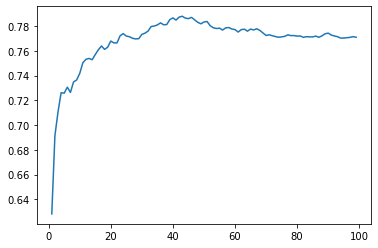

In [19]:
sns.lineplot(x=range(1,max_k),y=cv_score)

Here, we can see that the optimal value of k lies in the range (40, 60). To find the exact optimal value of k, we will use following function:

In [20]:
cv_score.index(max(cv_score))+1

43

In [21]:
#optimized KNN model
knn = KNeighborsClassifier(n_neighbors=43, metric='euclidean')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print("KNN Model\n")

print("ROC AUC : ", roc_auc_score(y_test, y_pred))

#classification report for KNN model
print(classification_report(y_test,y_pred))

KNN Model

ROC AUC :  0.7069298952457694
              precision    recall  f1-score   support

           0       0.76      0.93      0.83       146
           1       0.80      0.48      0.60        85

    accuracy                           0.77       231
   macro avg       0.78      0.71      0.72       231
weighted avg       0.77      0.77      0.75       231



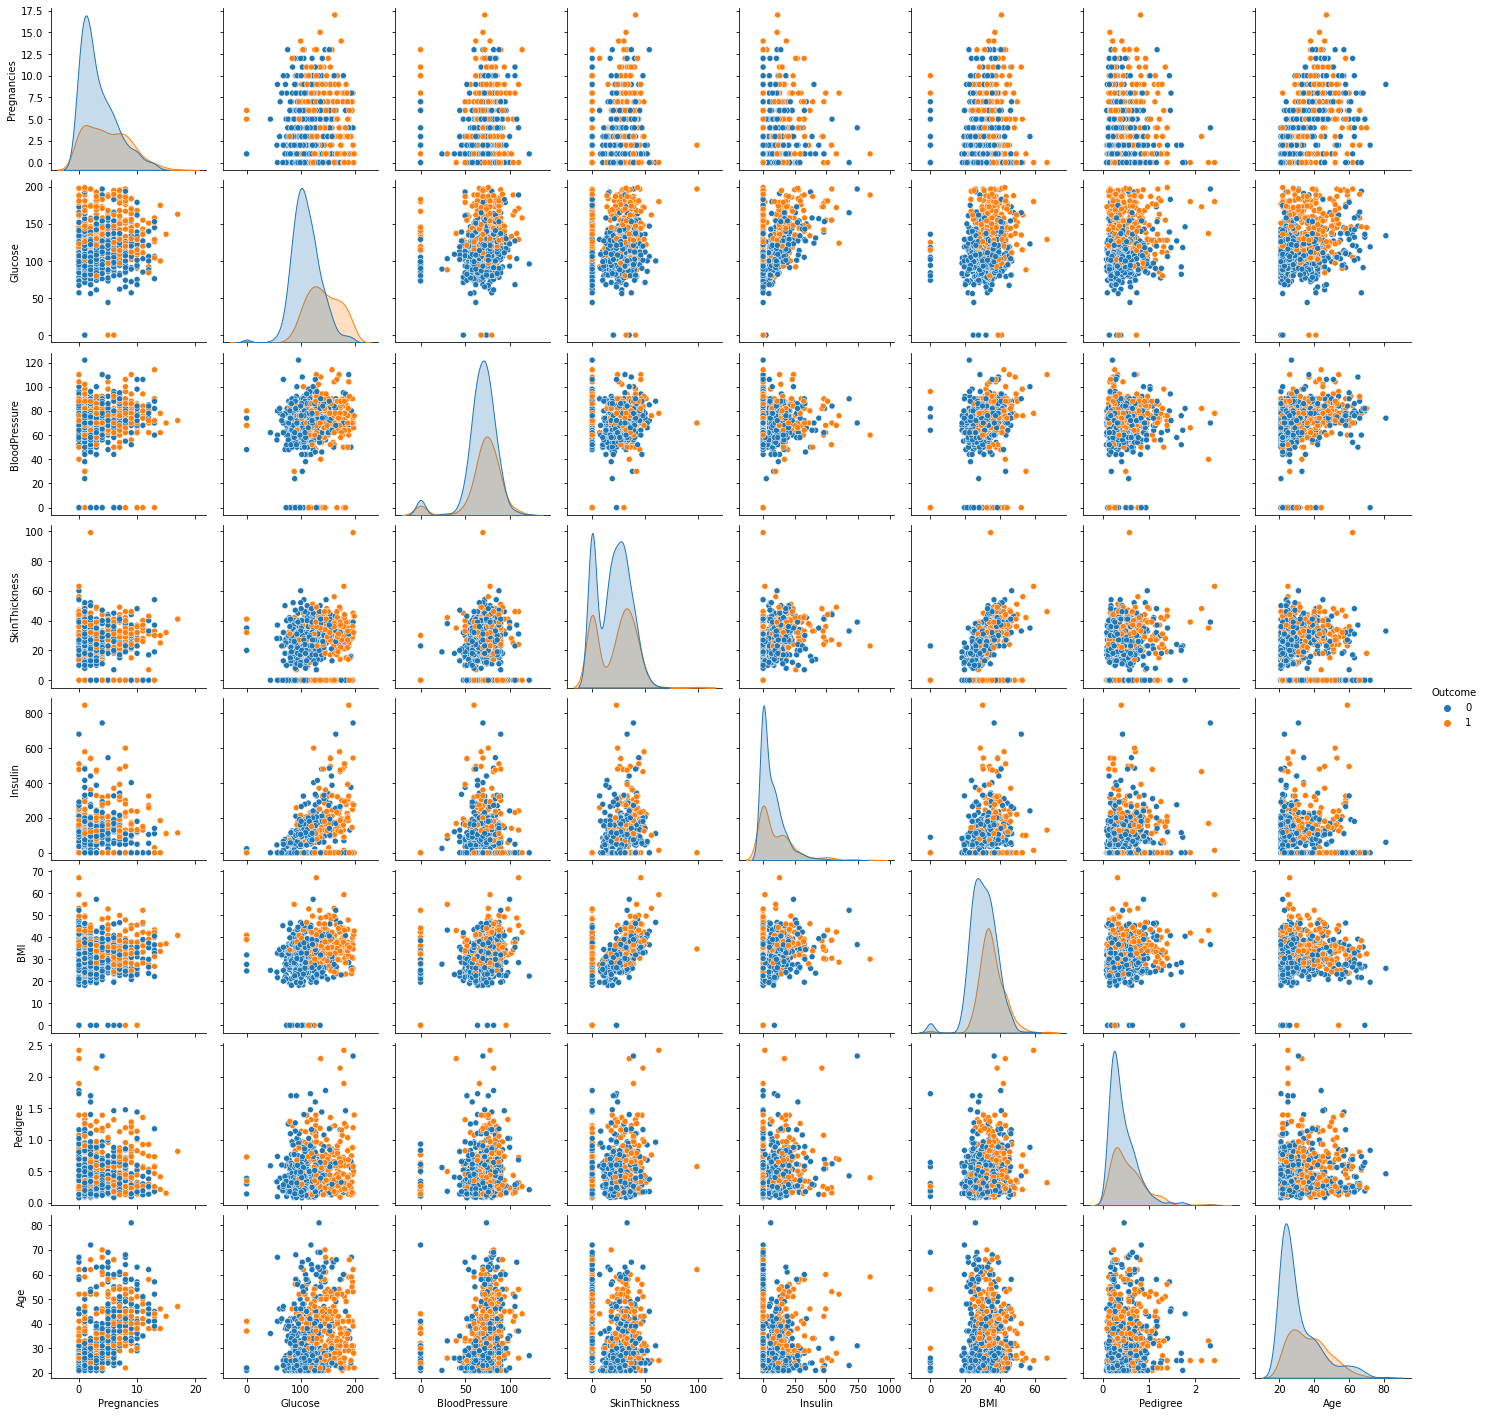

In [22]:
sns.pairplot(df,hue="Outcome")

<AxesSubplot:>

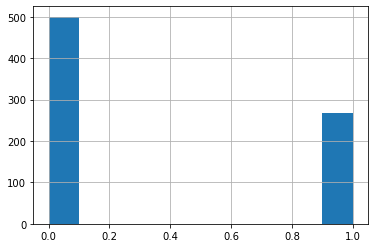

In [23]:
#accessing target variable distribution
df['Outcome'].hist()